<a href="https://colab.research.google.com/github/nihitchoudhary/Quantitative-Training-in-AI-ML/blob/main/DataAnalysisInFinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!! pip install plotly --upgrade

['Requirement already satisfied: plotly in /usr/local/lib/python3.10/dist-packages (5.24.1)',
 'Requirement already satisfied: tenacity>=6.2.0 in /usr/local/lib/python3.10/dist-packages (from plotly) (9.0.0)',
 'Requirement already satisfied: packaging in /usr/local/lib/python3.10/dist-packages (from plotly) (24.2)']

In [2]:
! pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 4.2 MB/s eta 0:00:00


In [3]:
import yfinance as yf

# use the Ticker module to access ticker data
msft = yf.Ticker("MSFT")
msft.info

{'address1': 'One Microsoft Way',
 'city': 'Redmond',
 'state': 'WA',
 'zip': '98052-6399',
 'country': 'United States',
 'phone': '425 882 8080',
 'website': 'https://www.microsoft.com',
 'industry': 'Software - Infrastructure',
 'industryKey': 'software-infrastructure',
 'industryDisp': 'Software - Infrastructure',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications across ERP, CRM, power 

In [4]:
# access a specific attribute from the dictionary
msft.info["marketCap"]


3200938934272

In [5]:
# download daily stock price data by passing in specified ticker and date range


from datetime import datetime


today_date = datetime.today().strftime('%Y-%m-%d')


print(today_date)


data = yf.download("MSFT", start="2024-07-01", end=today_date)


2024-12-28


[*********************100%***********************]  1 of 1 completed


In [6]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,,
2024-07-01,455.908264,456.730011,457.369995,445.660004,448.660004,17662800
2024-07-02,458.453674,459.279999,459.589996,453.109985,453.200012,13979800
2024-07-03,459.940979,460.769989,461.019989,457.880005,458.190002,9932800
2024-07-05,466.718781,467.559998,468.350006,458.970001,459.609985,16000300
2024-07-08,465.401154,466.239990,467.700012,464.459991,466.549988,12962300


In [7]:
data.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,,
2024-12-20,436.600006,436.600006,443.739990,428.630005,433.109985,64263700
2024-12-23,435.250000,435.250000,437.649994,432.829987,436.739990,19152500
2024-12-24,439.329987,439.329987,439.600006,434.190002,434.649994,7164500
2024-12-26,438.109985,438.109985,440.940002,436.630005,439.079987,8194200
2024-12-27,430.529999,430.529999,435.220001,426.350006,434.600006,18095100


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126 entries, 2024-07-01 to 2024-12-27
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, MSFT)  126 non-null    float64
 1   (Close, MSFT)      126 non-null    float64
 2   (High, MSFT)       126 non-null    float64
 3   (Low, MSFT)        126 non-null    float64
 4   (Open, MSFT)       126 non-null    float64
 5   (Volume, MSFT)     126 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 6.9 KB


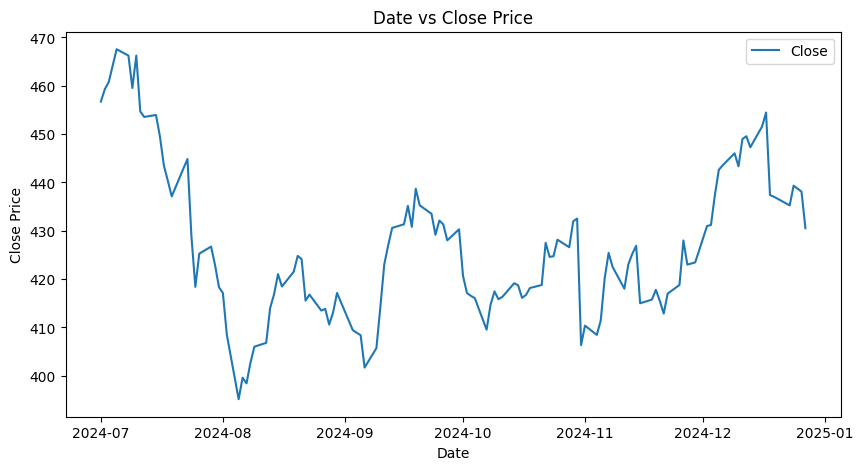

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your dataframe with datetime index and columns: open, high, close, low, volume

# Plot 1: Date vs Close values
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Close'], label='Close')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Date vs Close Price')
plt.legend()
plt.show()

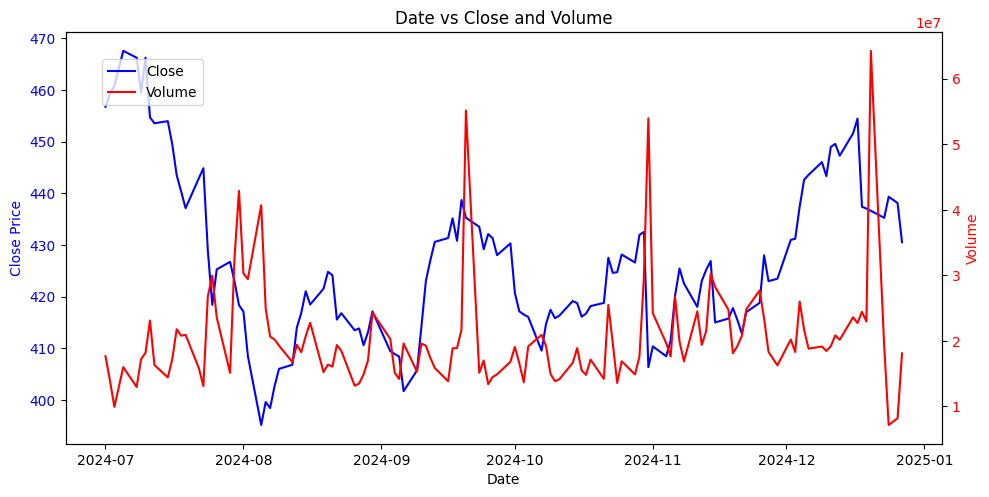

In [10]:
# Plot 2: Date vs Close and Volume in the same plot with common x-axis
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(data.index, data['Close'], color='b', label='Close')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(data.index, data['Volume'], color='r', label='Volume')
ax2.set_ylabel('Volume', color='r')
ax2.tick_params(axis='y', labelcolor='r')

fig.tight_layout()
plt.title('Date vs Close and Volume')
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))
plt.show()


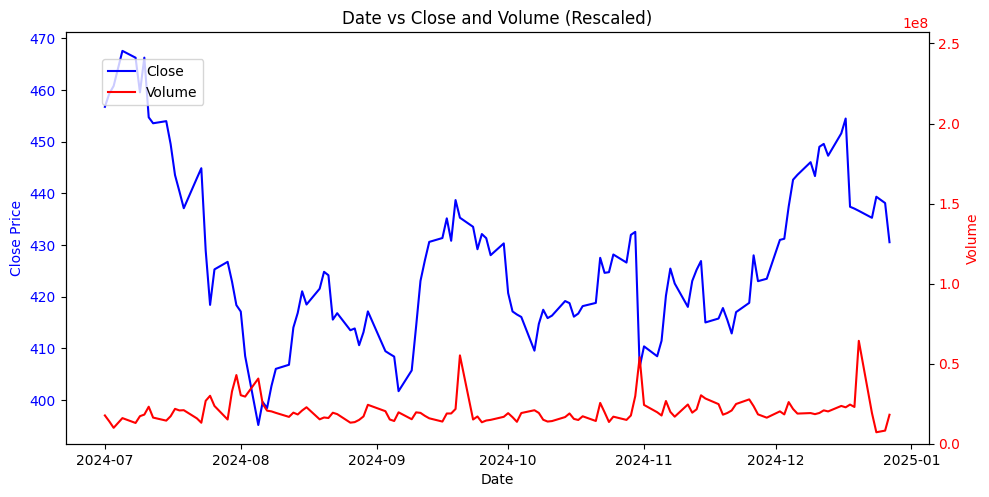

In [11]:
# Plot 3: Rescaling the Y-axis for better differentiation
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(data.index, data['Close'], color='b', label='Close')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(data.index, data['Volume'], color='r', label='Volume')
ax2.set_ylabel('Volume', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Rescale the volume axis for better differentiation
ax2.set_ylim(0, max(data['Volume'].values)*4)

fig.tight_layout()
plt.title('Date vs Close and Volume (Rescaled)')
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))
plt.show()

In [14]:
# Ensure the datetime converted to numeric
date_num = mpl_dates.date2num(data.index.values)
volume = data['Volume'].values.reshape(date_num.shape)
print(date_num.shape)
print(volume.shape)

(126,)
(126,)


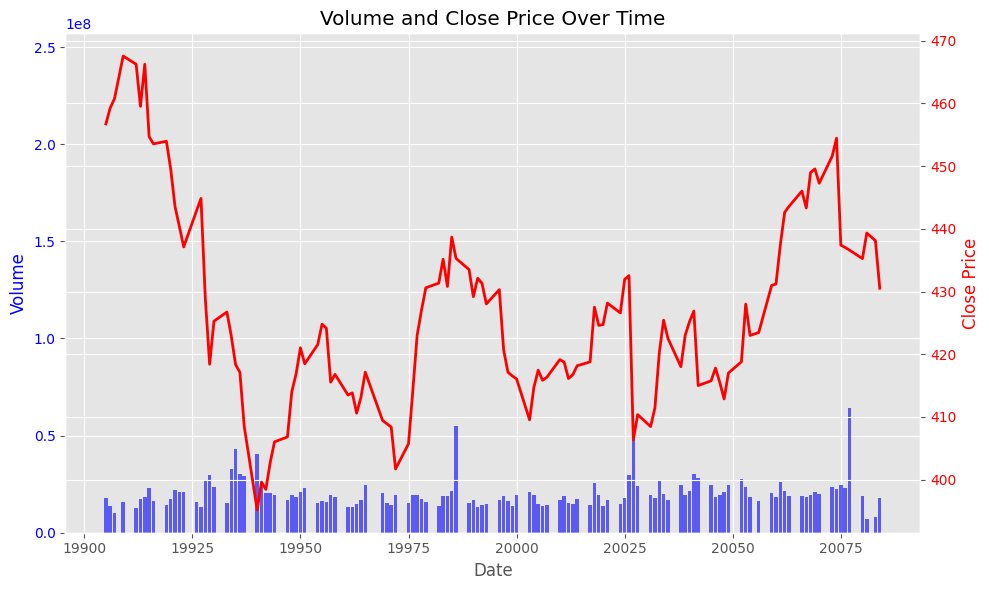

In [15]:
import matplotlib.pyplot as plt

# Ensure the datetime converted to numeric
date_num = mpl_dates.date2num(data.index.values)
volume = data['Volume'].values.reshape(date_num.shape)

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for 'Volume'
ax1.bar(date_num, volume, color='blue', alpha=0.6, label='Volume')
ax1.set_ylabel('Volume', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Rescale the volume axis for better differentiation
ax1.set_ylim(0, max(volume)*4)

# Line plot for 'Close' on the second y-axis
ax2 = ax1.twinx()
ax2.plot(date_num, data['Close'], color='red', label='Close', linewidth=2)
ax2.set_ylabel('Close Price', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set common x-axis label and title
ax1.set_xlabel('Date')
plt.title('Volume and Close Price Over Time')

# Improve layout and display the plot
fig.tight_layout()
plt.show()



In [15]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.9 MB/s eta 0:00:00


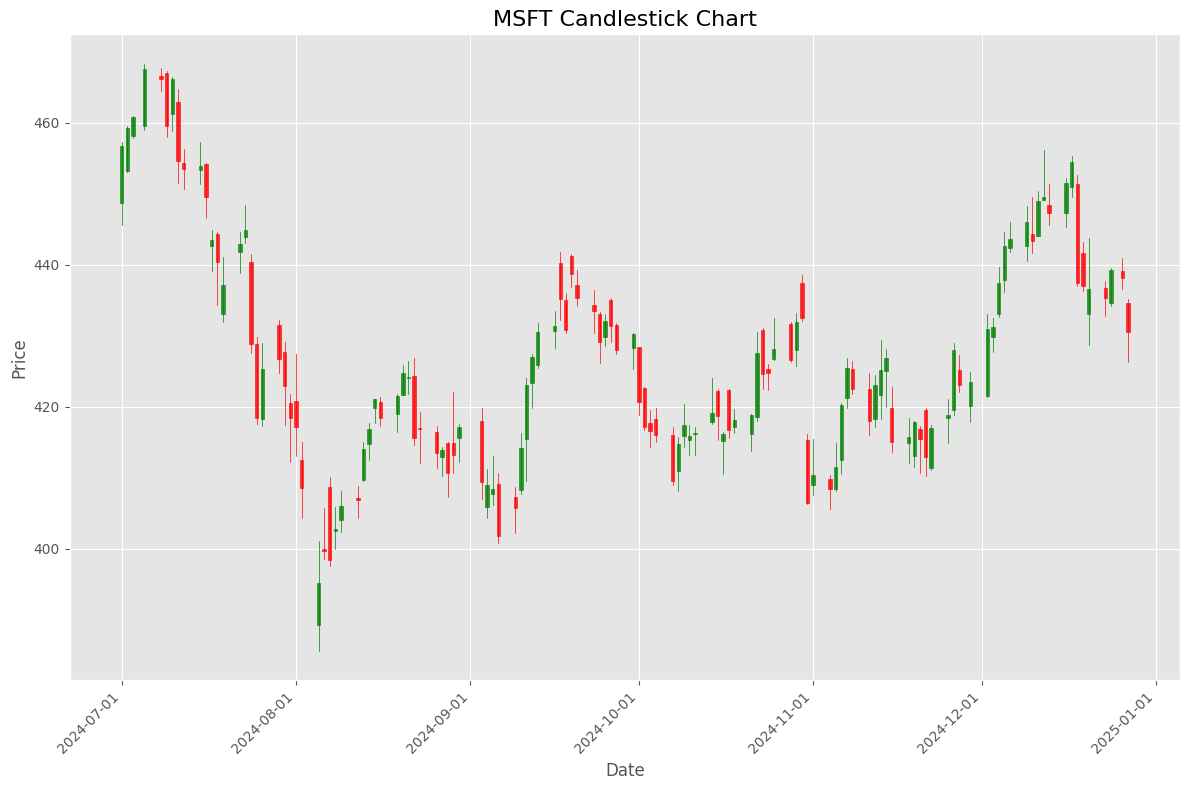

In [13]:
# prompt: Using dataframe data: Remove Adj Close column. Then, Using matplotlib library generate a candlestick plot for Open High Low Close values.

import pandas as pd
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates

# Remove the 'Adj Close' column (assuming it's a multi-index column)
if isinstance(data.columns, pd.MultiIndex):
    data = data.drop(columns=[('Adj Close', 'MSFT')], errors='ignore')  # ignore if the column does not exist
else:
    data = data.drop(columns=['Adj Close'], errors='ignore') #drop if it is a simple index
'''
# Convert the date column to datetime objects and set as index if it's not already
data['Date'] = pd.to_datetime(data.index) # Convert 'Date' to datetime if necessary
data = data.set_index('Date') #set index to date'''

# Convert the DataFrame to the format required by candlestick_ohlc
ohlc = data[['Open', 'High', 'Low', 'Close']].reset_index()
ohlc['Date'] = mpl_dates.date2num(ohlc['Date'].values)  # Convert date objects to numeric values


# Create the candlestick plot
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust figure size if needed
candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mpl_dates.DateFormatter('%Y-%m-%d'))  #format date display


# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')


# Add title and labels
plt.title('MSFT Candlestick Chart', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)

plt.tight_layout()
plt.show()
